In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import ensemble
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

C:\Users\cvargasa\AppData\Local\conda\conda\envs\cnn\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\cvargasa\AppData\Local\conda\conda\envs\cnn\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
file_consumos = "data_merged.csv" ## datos en duro de consumos y temperaturas 

In [3]:
df = pd.read_csv(file_consumos , sep=';' ,  encoding='utf-8' , decimal=',' ) #decimal para leer las comas

In [4]:
df[['AÑO', 'MES', 'CONSUMO', 'max', 'avg', 'min']] = df[['AÑO', 'MES', 'CONSUMO', 'max', 'avg', 'min']].astype('float32')
df = df[[ 'AÑO', 'MES', 'CONSUMO', 'max', 'avg', 'min']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293667 entries, 0 to 293666
Data columns (total 6 columns):
AÑO        293667 non-null float32
MES        293667 non-null float32
CONSUMO    293667 non-null float32
max        293667 non-null float32
avg        293667 non-null float32
min        293667 non-null float32
dtypes: float32(6)
memory usage: 6.7 MB


In [81]:
df = df[[ 'AÑO', 'MES', 'CONSUMO', 'max', 'avg', 'min']].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293667 entries, 0 to 293666
Data columns (total 6 columns):
AÑO        293667 non-null int32
MES        293667 non-null int32
CONSUMO    293667 non-null int32
max        293667 non-null int32
avg        293667 non-null int32
min        293667 non-null int32
dtypes: int32(6)
memory usage: 6.7 MB


## Random forest 

In [16]:
from sklearn import tree
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split

In [20]:
df = pd.read_csv('hot_data.csv' , sep=';' ,  encoding='utf-8' , decimal='.' ) #decimal para leer las comas

In [23]:
df = df.astype('float32')

In [82]:
X_train, X_test, y_train, y_test = train_test_split( df.drop(['CONSUMO'], axis=1) , df[['CONSUMO']] , test_size=0.05, random_state=20)

In [27]:
##Eliminiando el error de continous de la variable  y 
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[1170  533 2163 ... 3116 2553 1271]
continuous
multiclass
multiclass


C:\Users\cvargasa\AppData\Local\conda\conda\envs\cnn\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [83]:
clf = tree.DecisionTreeClassifier()

In [84]:
clf= clf.fit(X_train , y_train)

In [85]:
Y_pred = clf.predict(X_test)

In [86]:
Y_pred.shape

(14684,)

In [72]:
lab_enc_2 = preprocessing.LabelEncoder()
y_test_encoded = lab_enc_2.fit_transform(y_test)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_test))
print(utils.multiclass.type_of_target(y_test.astype('int')))
print(utils.multiclass.type_of_target(y_test_encoded))

[1170  533 2163 ... 3116 2553 1271]
continuous
multiclass
multiclass


C:\Users\cvargasa\AppData\Local\conda\conda\envs\cnn\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
#a.reshape((1, -1))
training_scores_encoded.shape


(278983,)

In [87]:
Y_pred.shape

(14684,)

In [93]:
y_test[['CONSUMO']].values

array([[120],
       [174],
       [152],
       ...,
       [128],
       [ 40],
       [191]])

In [98]:
np.mean(y_train[['CONSUMO']].values  , Y_pred.values)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

ValueError: x and y must be the same size

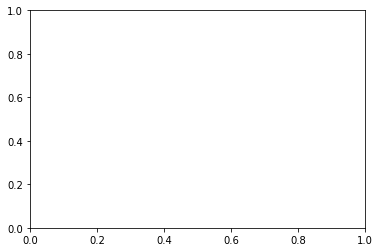

In [99]:
plt.scatter( Y_pred  , y_train[['CONSUMO']].values  , c='b' , edgecolors=(0,0,0) , alpha = 0.5)
plt.title('Valores estimados V/S data real')
plt.xlabel('test values ')
plt.ylabel('valores estimados')
plt.show()

## Stats Report

In [5]:
class Stats:
    
    def __init__(self, X, y, model):
        self.data = X
        self.target = y
        self.model = model
        ## degrees of freedom population dep. variable variance
        self._dft = X.shape[0] - 1   
        ## degrees of freedom population error variance
        self._dfe = X.shape[0] - X.shape[1] - 1  
    
    def sse(self):
        '''returns sum of squared errors (model vs actual)'''
        squared_errors = (self.target - self.model.predict(self.data)) ** 2
        return np.sum(squared_errors)
        
    def sst(self):
        '''returns total sum of squared errors (actual vs avg(actual))'''
        avg_y = np.mean(self.target)
        squared_errors = (self.target - avg_y) ** 2
        return np.sum(squared_errors)
    
    def r_squared(self):
        '''returns calculated value of r^2'''
        return 1 - self.sse()/self.sst()
    
    def adj_r_squared(self):
        '''returns calculated value of adjusted r^2'''
        return 1 - (self.sse()/self._dfe) / (self.sst()/self._dft)
    
def pretty_print_stats(stats_obj):
    '''returns report of statistics for a given model object'''
    items = ( ('sse:', stats_obj.sse()), ('sst:', stats_obj.sst()), 
             ('r^2:', stats_obj.r_squared()), ('adj_r^2:', stats_obj.adj_r_squared()) )
    for item in items:
        print('{0:8} {1:.4f}'.format(item[0], item[1])) 

In [ ]:
        
stats = Stats(X, y, lr)
pretty_print_stats(stats)

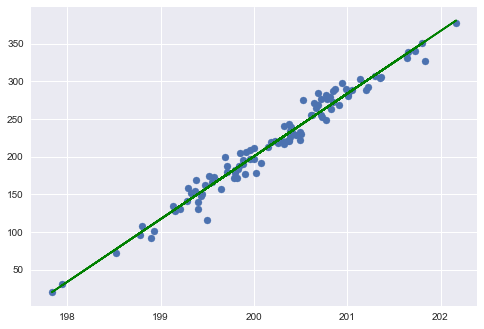

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
%matplotlib inline

#Generate data
regression_data, regression_values = make_regression(n_samples=100,n_features=1,n_informative=1,noise=10)

#Set X, y_true (and shift to quadrant 1)
X = regression_data[:,0].reshape(100,1)+200
y_true = regression_values.reshape(100,1)+200

##Fit data
lr_model = LinearRegression()
lr_model.fit(X,y_true)

#Make predictions
y_pred = lr_model.predict(X)

#Plot Data
plt.style.use('seaborn')
plt.scatter(X,y_true)
plt.plot(X,y_pred,'g-');

In [7]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, median_absolute_error,explained_variance_score,r2_score
import numpy as np

In [8]:
        
stats = Stats(X,y_true, lr_model)
pretty_print_stats(stats)

sse:     14223.2782
sst:     480271.7407
r^2:     0.9704
adj_r^2: 0.9701


In [9]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd


# CARGAR DATASET DE DROPBOX
#-----------------------------------------------------------------
data = pd.read_csv('https://www.dropbox.com/s/cugxdc9mhau4nw1/titanic2.csv?dl=1')
data = data.as_matrix()
data = np.matrix(data)


# CREA dataset TRAIN y TEST
#---------------------------------------------------------------------------------------------
np.random.seed(123)
m_train    = np.random.rand(len(data)) < 0.5
data_train = data[m_train,]
data_test  = data[~m_train,]


# CLASE
#---------------------------------------------------------------------------------------------
clase_train = data_train[:,-1]
clase_train = clase_train.A1 #convierte de matriz a vector 
clase_test  = data_test[:,-1]
clase_test  = clase_test.A1 #convierte de matriz a vector 


# MODELO
#---------------------------------------------------------------------------------------------
modelo_lr = LogisticRegression()
modelo_lr.fit(X=data_train[:,:-1],y=clase_train)


# PREDICCION
#---------------------------------------------------------------------------------------------
predicion = modelo_lr.predict(data_test[:,:-1])


# METRICAS
#---------------------------------------------------------------------------------------------
print(metrics.classification_report(y_true=clase_test, y_pred=predicion))
print(pd.crosstab(data_test[:,-1].A1, predicion, rownames=['REAL'], colnames=['PREDICCION']))

             precision    recall  f1-score   support

        0.0       0.81      0.86      0.84       214
        1.0       0.78      0.71      0.74       143

avg / total       0.80      0.80      0.80       357

PREDICCION  0.0  1.0
REAL                
0.0         185   29
1.0          42  101


C:\Users\cvargasa\AppData\Local\conda\conda\envs\cnn\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
